In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dat/all_acc.txt', sep='\t')
df['error'] = 100 - df['acc'] * 100
print(df.head())
print(df['method'].unique())

   index       acc  method     ref continents     error
0      0  0.975945  SNPBag  SNPBag        CSA  2.405483
1      1  0.975413  SNPBag  SNPBag        CSA  2.458721
2      2  0.942465  SNPBag  SNPBag        AFR  5.753499
3      3  0.961277  SNPBag  SNPBag        AFR  3.872317
4      4  0.963653  SNPBag  SNPBag        AFR  3.634697
['SNPBag' 'eagle_REF' 'eagle_noREF' 'shapeit_REF' 'beagle_REF'
 'beagle_noREF']


In [2]:
def standard_error(x):
    return x.std(ddof=1) / (len(x) ** 0.5)

def standard_deviation(x):
    return x.std(ddof=1)

def confidence_interval(x):
    return x.std(ddof=1) * 1.96 / (len(x) ** 0.5)

In [3]:
df_stats = df.groupby('method')['error'].agg(mean='mean', eb=standard_error).reset_index()

In [4]:
# sort by mean error
df_stats = df_stats.sort_values('mean', ascending=False)

In [5]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches/2)


methods:
 ['eagle_noREF', 'beagle_noREF', 'SNPBag', 'eagle_REF', 'beagle_REF', 'shapeit_REF']


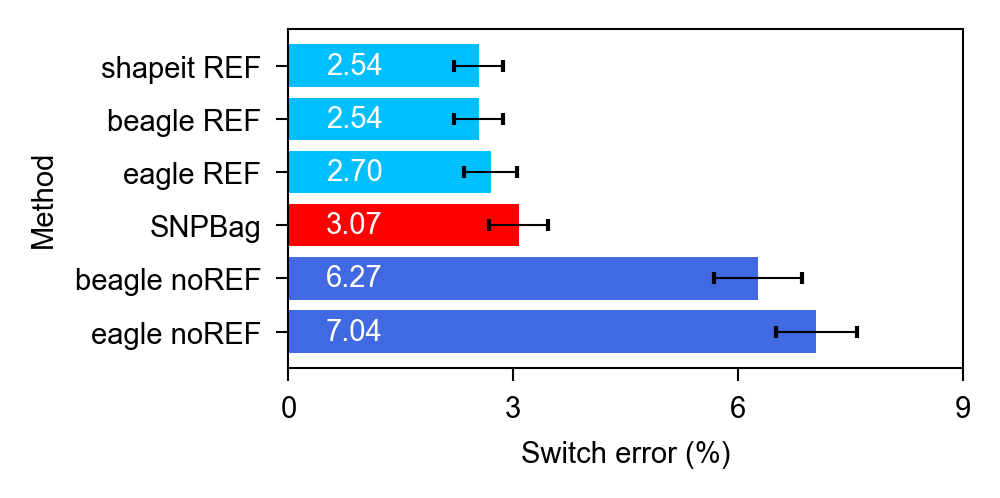

In [6]:

methods = list(df_stats['method'].unique())
print('methods:\n', methods)
method_pos = np.arange(len(methods))

# Define a color mapping for each method
method2color = {}
for i,method in enumerate(methods):
    if 'SNPBag' in method:
        method2color[method] = 'red'
    elif '_REF' in method:
        method2color[method] = 'deepskyblue'
    elif '_noREF' in method:
        method2color[method] = 'royalblue'

method2label = {}
for i,method in enumerate(methods):
    if 'SNPBag' in method:
        method2label[method] = 'SNPBag'
    elif '_REF' in method:
        method2label[method] = method.replace('_REF', ' REF')
    elif '_noREF' in method:
        method2label[method] = method.replace('_noREF', ' noREF')


bar_colors = [method2color[method] for method in df_stats['method']]

# make horizontal barplot of accuracy by method with error bars
plt.figure(figsize=figsize)

# Plot horizontal bars with error bars using matplotlib, applying color mapping
bars = plt.barh(
    df_stats['method'],
    df_stats['mean'],
    xerr=df_stats['eb'],
    capsize=capsize,
    edgecolor='black',
    color=bar_colors,
    linewidth=0,
)

# Add text to each bar
for bar, mean, err in zip(bars, df_stats['mean'], df_stats['eb']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        # width + 1, y,
        0.5, y,
        f"{mean:.2f}",
        va='center',
        ha='left',
        fontsize=fontsize,
        color='white'
    )

# update y tick labels
plt.yticks(method_pos, [method2label[method] for method in methods])

plt.xlabel('Switch error (%)')
plt.ylabel('Method')
plt.tight_layout()
plt.xlim(0, 9)
plt.xticks(np.arange(0, 10, 3))
plt.tight_layout()
plt.savefig(f'switch_error_methods.pdf')
plt.show()
plt.close()